<a href="https://colab.research.google.com/github/mb1te/SMPR/blob/main/SMPR_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ЗАДАНИЕ 7. МЕТОД ОПОРНЫХ ВЕКТОРОВ. ROC-КРИВАЯ.**

SVM производит классификацию на основе нескольких элементов обучающей выборки. Они называются опорными векторами.

Если выборка линейно разделима, то разделяющую гиперплоскость можно провести многими способами. В SVM она выбирается таким образом, чтобы она отстояла максимально далеко от обоих классов.

Умножим алгоритм $a(x)$ на некоторую константу так, чтобы минимальный отступ в каждом классе был равен единице. Тогда полосу, разделяющую классы описывает множество точек: $\{x: -1 \le <w, x> -\,\, w_0 \le 1\}$.

На границах полосы получим две гиперплоскости, на которых лежат объекты с минимальными отступами. 

Ширина полосы равна: $\langle (x_{+} - x_{-}), \frac{w}{||w||}\rangle = \frac{\langle w, x _{+} \rangle - \langle w, x_{-} \rangle}{||w||} = \frac{w_0 + 1 + w_0 - 1}{||w||} = \frac{2}{||w||}$.

Для линейно неразделимой выборки необходимо разрешить алгоритму ошибаться на нескольких элементах выборки. 

Пусть $\xi_i$ - величина ошибки. Запишем математическую модель задачи оптимизации:

$\begin{cases}
\frac{1}{2} \langle w, w \rangle + C \sum\limits_{i = 1}^l \xi_i \rightarrow \min\limits_{w,w_0,\xi}; \\ 
y_i (\langle w, x_i \rangle - w_0) \ge 1 - \xi_i, i = \overline{1, l}; \\ 
\xi_i >= 0, i = \overline{1, l};
\end{cases}$



**TODO: написать свою реализацию SVM.**

Первоначально же для разбора случаев и построения ROC-кривой воспользуемся реализацией из scikit-learn.

**ROC-кривая**

$ROC$-кривая показывает зависимость количества верно классифицированных положительных примеров от количества неверно классифицированных отрицательных примеров.

Алгоритм построения: 

Пусть алгоритм выдал оценки ответов и сами классы, запишем их в таблицу. Упорядочим их сначала по оценкам. В идеале столбец «класс» тоже станет упорядочен (сначала идут $1$, потом $0$); в самом худшем случае – порядок будет обратный (сначала $0$, потом $1$).

Чтобы нарисовать ROC-кривую, надо взять единичный квадрат на координатной плоскости, разбить его на $m$ равных частей горизонтальными линиями и на n – вертикальными, где $m$ – число $1$ среди правильных меток теста, $n$ – число нулей. В результате квадрат разбивается сеткой на $m \times n$ блоков.

Теперь будем просматривать строки сверху вниз и прорисовывать на сетке линии, переходя их одного узла в другой. Стартуем из точки $(0, 0)$. Если значение метки класса в просматриваемой строке $1$, то делаем шаг вверх; если $0$, то делаем шаг вправо. Ясно, что в итоге мы попадём в точку $(1, 1)$, т.к. сделаем в сумме m шагов вверх и $n$ шагов вправо.


$AUC ROC$ – площадь под $ROC$-кривой – часто используют для оценивания качества упорядочивания алгоритмом объектов двух классов. 

In [ ]:
from sklearn import svm
import matplotlib.pyplot as plt


"""
Классификатор на основе SVM.
Его назначение это рисование графиков опорных объектов и ROC-кривой 
"""
class SVMClassifier:
  def __init__(self, X, y):
    self.X = X
    self.y = y
    self.clf = svm.SVC(probability=True)
    self.clf.fit(self.X, self.y)

  """
  Метод рисует опорные объекты классификатора
  """
  def plot_support_vectors(self):
    color = {1: 'green', 0: 'red'}

    for ind in range(len(self.X)):
        plt.scatter(self.X['x'].values[ind], self.X['y'].values[ind],
                  color='none', edgecolors=color[self.y.values[ind][0]])
        
    for point in self.clf.support_vectors_:
      plt.scatter(point[0], point[1],
                  color=color[self.clf.predict([point])[0]], edgecolors='black')
    plt.show()
  
  """
  Метод рисует ROC-кривую по алгоритму описанному выше
  """
  def plot_roc_curve(self):
    matrix = []
    for i in range(len(self.X)):
      cur = [self.clf.predict_proba([self.X.iloc[i]])[0][1], self.y.iloc[i].values[0]]
      matrix.append(cur)
    matrix.sort(key=lambda x: x[0], reverse=True)
    
    tp, fp = 0, 0
    x = []
    y = []
    for row in matrix:
      if row[1] == 1:
        tp += 1
      else:
        fp += 1
      x.append(fp)
      y.append(tp)
    
    plt.plot(x, y)
    plt.show()
    


1) Случай линейно разделимой выборки:

Сгенерируем выборку:

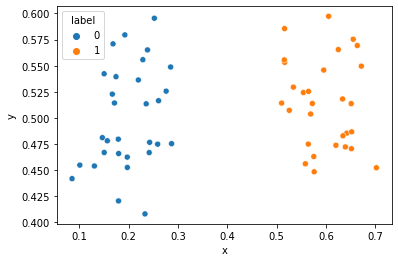

In [ ]:
import numpy as np
import pandas as pd

GROUP_SIZE = 30


"""
Функция generate_array генерирует массив точек заданного размера 
согласно заданным параметрам нормального распределения
"""
def generate_array(m1, d1, m2, d2,  size=GROUP_SIZE):
  return np.concatenate(
    (
      np.random.normal(m1, d1, size=size),
      np.random.normal(m2, d2, size=size)
    )
  )


df = pd.DataFrame(
  {
    'x': generate_array(0.2, 0.05, 0.6, 0.05),
    'y': generate_array(0.5, 0.05, 0.5, 0.05),
    'label': np.array([0] * GROUP_SIZE + [1] * GROUP_SIZE)
  }
)

X = df[['x', 'y']]
y = df[['label']]

import seaborn as sns
sns.scatterplot(data=df, x='x', y='y', hue='label')

Опорные объекты и AUC ROC:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


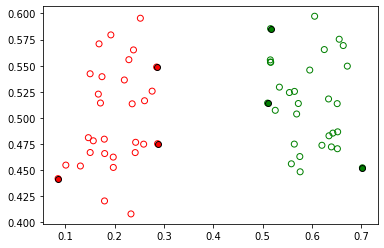

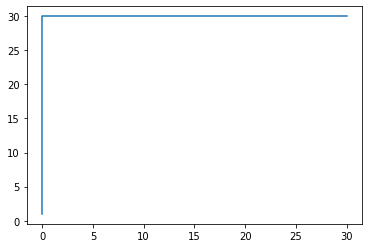

In [ ]:
svmc = SVMClassifier(X, y)
svmc.plot_support_vectors()
svmc.plot_roc_curve()

2) Малое число объектов мешают линейной разделимости


Сгенерируем выборку

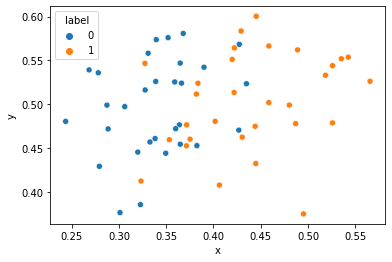

In [ ]:
GROUP_SIZE = 30

df = pd.DataFrame(
  {
    'x': generate_array(0.35, 0.05, 0.45, 0.05),
    'y': generate_array(0.5, 0.05, 0.5, 0.05),
    'label': np.array([0] * GROUP_SIZE + [1] * GROUP_SIZE)
  }
)

X = df[['x', 'y']]
y = df[['label']]

sns.scatterplot(data=df, x='x', y='y', hue='label')

Опорные объекты и AUC ROC:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


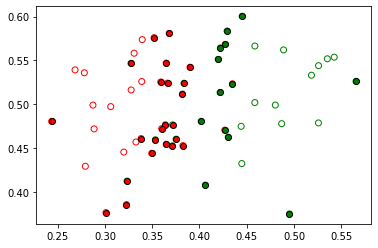

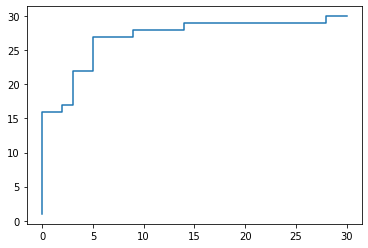

In [ ]:
svmc = SVMClassifier(X, y)
svmc.plot_support_vectors()
svmc.plot_roc_curve()

3) Среднее число объектов мешают линейной разделимости

Сгенерируем выборку:

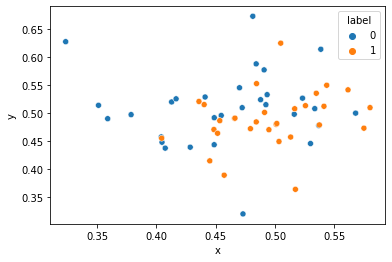

In [ ]:
GROUP_SIZE = 30

df = pd.DataFrame(
  {
    'x': generate_array(0.46, 0.05, 0.49, 0.05),
    'y': generate_array(0.5, 0.05, 0.5, 0.05),
    'label': np.array([0] * GROUP_SIZE + [1] * GROUP_SIZE)
  }
)

X = df[['x', 'y']]
y = df[['label']]

sns.scatterplot(data=df, x='x', y='y', hue='label')

Опорные объекты и AUC ROC:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


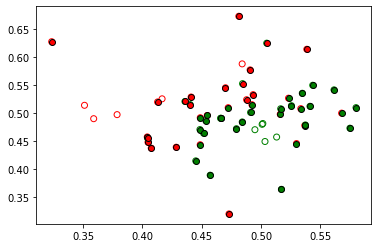

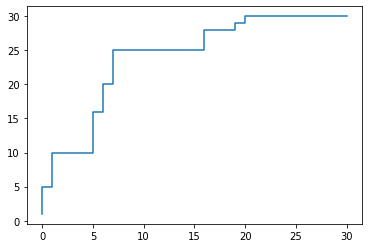

In [ ]:
svmc = SVMClassifier(X, y)
svmc.plot_support_vectors()
svmc.plot_roc_curve()

Преимущества алгоритма:

- Высокая скорость работы.
- Хорошее качество классификации.

Недостатки алгоритма:

- Сложность реализации
